# <center>  Credit Card Dataset for Clustering 

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------- sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#-------------------------------------#

In [2]:
df=pd.read_csv('CC GENERAL.csv')
print(df.shape)
df.head(2)

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


## EDA

In [3]:
# check missing values
for i in df.columns:
    if df[i].isnull().any()==True: #check for columns with null values
        Missing=df[i].isnull().sum() # check number of null values in each column
        Miss_per=(df[i].isnull().sum()/df.shape[0])*100 # check number of null values percentage in each column
        print(i,Missing,Miss_per)

CREDIT_LIMIT 1 0.0111731843575419
MINIMUM_PAYMENTS 313 3.4972067039106145


In [4]:
df=df.drop(["CREDIT_LIMIT","MINIMUM_PAYMENTS"],axis=1)

In [5]:
#checking categorical
for i in df.columns:
    if df[i].dtype=='object':
        print(i,len(df[i].unique()))

CUST_ID 8950


In [6]:
df=df.drop(["CUST_ID"],axis=1)

In [7]:
df_cor=df.corr()
df_cor

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.322802,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.065008,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.603264,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.567292,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.384084,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.453238,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.103464,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.243537,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.085551,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.183192,-0.249773,-0.133372


In [8]:
## Removing high correlated features
print(df["PURCHASES"]. corr(df["ONEOFF_PURCHASES"]))
print(df["PURCHASES_INSTALLMENTS_FREQUENCY"]. corr(df["PURCHASES_FREQUENCY"]))
df_filt=df.drop(["PURCHASES","PURCHASES_INSTALLMENTS_FREQUENCY"],axis=1)
print(df_filt.shape)

0.9168445587151446
0.8629336372699662
(8950, 13)


In [9]:
scale=MinMaxScaler()
df_scaled_f=pd.DataFrame(scale.fit_transform(df_filt),columns=df_filt.columns)

<AxesSubplot:>

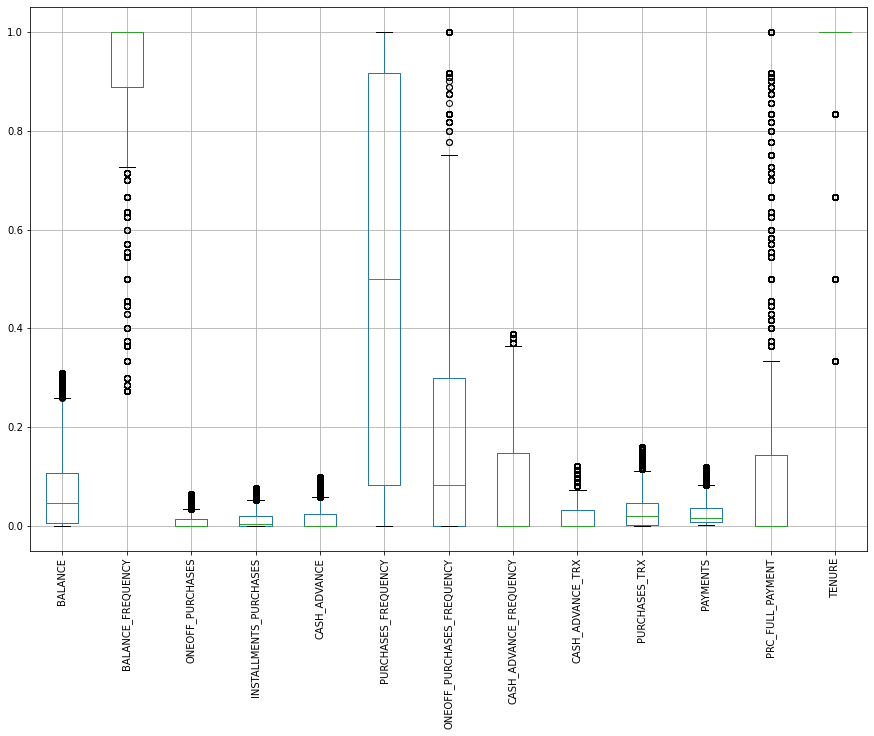

In [20]:
df_scaled_f.boxplot(figsize=(15,10),rot=90)

In [11]:
#dealing outliers
for i in df_scaled_f.columns:
    Q3=df_scaled_f[i].quantile([0.95]).values[0]
    Q1=df_scaled_f[i].quantile([0.05]).values[0]
    df_scaled_f[i] = df_scaled_f[i].mask(df_scaled_f[i] >Q3, Q3)
    df_scaled_f[i] = df_scaled_f[i].mask(df_scaled_f[i] <Q1, Q1)

<AxesSubplot:>

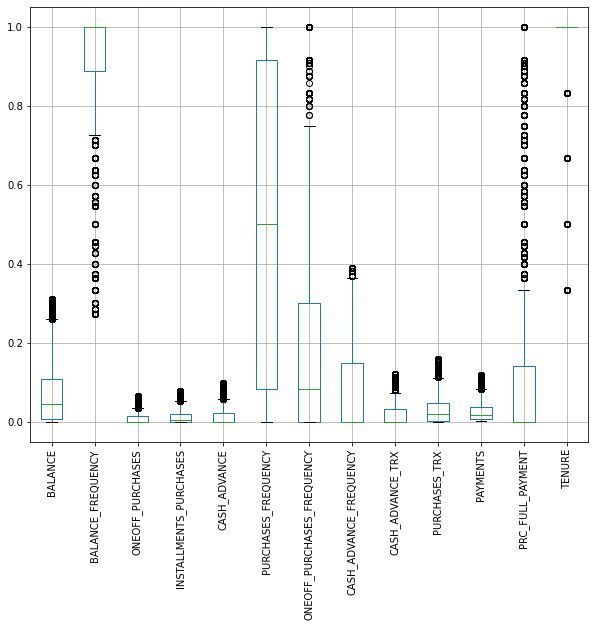

In [12]:
df_scaled_f.boxplot(figsize=(10,8),rot=90)

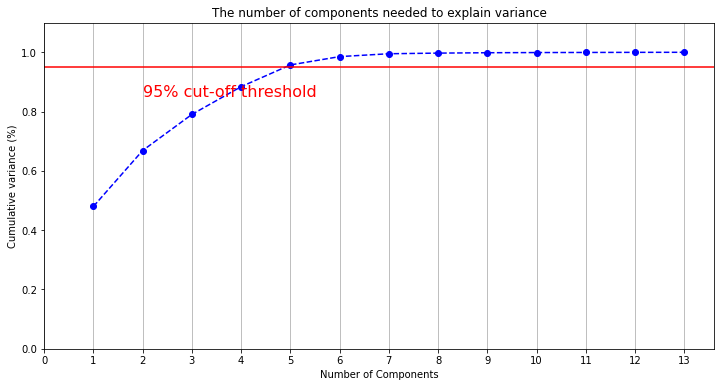

In [13]:
pca=PCA().fit(df_scaled_f)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df_scaled_f.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, df_scaled_f.shape[1]+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

#The axhline() function in pyplot module of matplotlib library is used to add a horizontal line across the axis
plt.axhline(y=0.95, color='r', linestyle='-') 
plt.text(2, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [14]:
pca=PCA(n_components=5,random_state=0) # sklearn.decomposition._pca.PCA
pct=pca.fit_transform(df_scaled_f) # numpy.ndarray
print("Cumulative variance %: ",pca.explained_variance_ratio_.sum())
df_pc=pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5'])
df_pc.head()

Cumulative variance %:  0.9573798833290543


,pc1,pc2,pc3,pc4,pc5
0,-0.401263,-0.001756,-0.034505,0.031790,-0.117186
1,-0.484015,0.114375,0.106623,-0.208643,-0.034075
2,0.762649,-0.457507,0.347432,0.150941,-0.041897
3,-0.461585,0.028737,0.100423,0.160225,-0.143924
4,-0.410177,-0.097200,0.059741,-0.126729,-0.067592


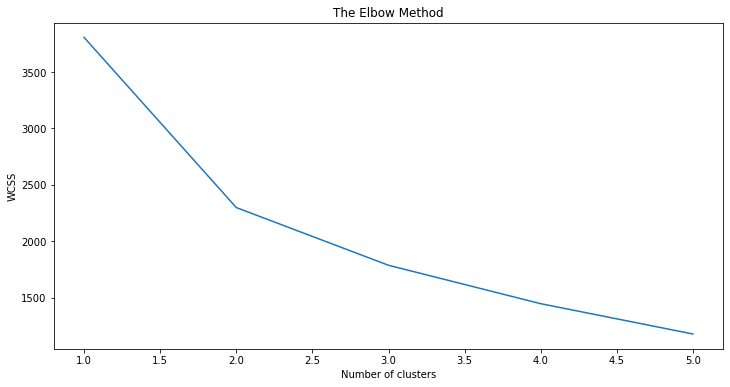

In [15]:
wcss = []
for i in range(1,df_pc.shape[1]+1):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_pc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, df_pc.shape[1]+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Kmeans
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_pc)
#kmeans.fit(df_scaled)
print(kmeans.inertia_)

2298.8919826922142


In [17]:
label=kmeans.predict(df_pc)
df_pc.head()
df_pc['label']=label
df_pc.head()

,pc1,pc2,pc3,pc4,pc5,label
0,-0.401263,-0.001756,-0.034505,0.031790,-0.117186,1
1,-0.484015,0.114375,0.106623,-0.208643,-0.034075,1
2,0.762649,-0.457507,0.347432,0.150941,-0.041897,0
3,-0.461585,0.028737,0.100423,0.160225,-0.143924,1
4,-0.410177,-0.097200,0.059741,-0.126729,-0.067592,1


In [18]:
label_0 = df_pc[label == 0].drop(["label"],axis=1)
label_1 = df_pc[label == 1].drop(["label"],axis=1)

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], dtype='object')


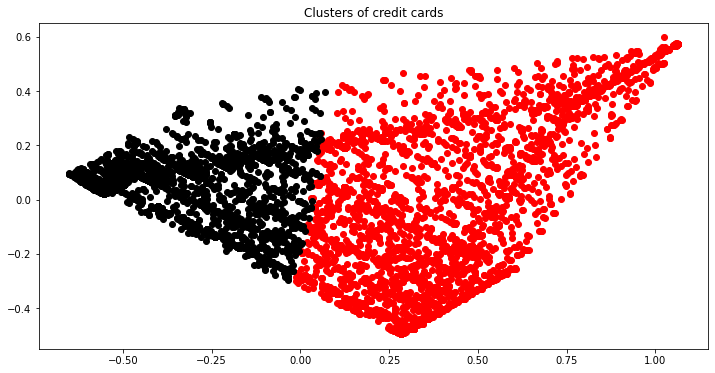

In [19]:
cols = label_0.columns
print(cols)
plt.scatter(label_0[cols[0]], label_0[cols[2]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[2]], color = 'black')
plt.title('Clusters of credit cards')
plt.show()